In [3]:
%load_ext autoreload
%autoreload 2

import os
import pickle
import sys
from pathlib import Path
import datetime
import lab.torch as B
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from wbml import plot
import tueplots
from collections import defaultdict
torch.set_printoptions(profile='full') # 'short'

colors = sns.color_palette("bright")
sns.set_style("whitegrid")
sns.set_palette(colors)


from tueplots import bundles, fontsizes, figsizes
plt.rcParams.update({**figsizes.neurips2022(ncols=1), **fontsizes.neurips2022()})
matplotlib.rcParams["figure.dpi"] = 300  # for high quality, retina plots


from wbml import plot

### Locations

In [4]:
img_folder = 'tmp'

In [5]:
# include = [
#             # Adult GVI
#             "draft_results/Adult/GVI/A/07-24-13.50.19_sync-mfvi-adult-1c-10g-1000l-nealprior-128b-0-02lr-2s-gvi",
#             "draft_results/Adult/GVI/A/07-24-14.46.53_seq-pvi-adult-1c-10g-1000l-nealprior-128b-0-02lr-2s-100m-gvi",

#             # Bank GVI
#             "draft_results/Bank/GVI/A/07-24-13.54.22_seq-mfvi-bank-1c-10g-1000l-nealprior-128b-0-02lr-2s-gvi",
#             "draft_results/Bank/GVI/A/07-24-14.48.55_seq-pvi-bank-1c-10g-1000l-nealprior-128b-0-02lr-2s-100m",

#             # Bank Seq
#             "draft_results/Bank/Seq/A/07-24-13.01.24_seq-pvi-bank-10c-10g-1000l-nealprior-128b-0-02lr-2s-100m",
#             "draft_results/Bank/Seq/A/07-24-13.21.51_seq-mfvi-bank-10c-10g-1000l-nealprior-128b-0-02lr-2s",
            
#             # Adult Seq
#             "draft_results/Adult/Seq/A/07-24-10.11.10_seq-pvi-adult-10c-10g-1000l-nealprior-128b-0-02lr-2s-100m-project-tight",
#             "draft_results/Adult/Seq/A/07-24-10.12.05_seq-mfvi-adult-10c-10g-1000l-nealprior-128b-0-02lr-2s-equaltogi",
#             # "draft_results/Adult/Seq/B/07-25-16.02.09_seq-pvi-adult-10c-10g-1000l-nealprior-splitb-128b-0-02lr-2s-100m",
#             # "draft_results/Adult/Seq/B/07-25-17.56.14_seq-mfvi-adult-10c-10g-1000l-nealprior-splitb-128b-0-02lr-2s",
            

#             # Bank - Split B
#             # "draft_results/Bank/Seq/B/07-25-17.58.15_seq-pvi-bank-10c-10g-1000l-nealprior-splitb-128b-0-02lr-2s-100m", 
#             # "draft_results/Bank/Seq/B/07-25-19.29.52_seq-mfvi-bank-10c-10g-1000l-nealprior-splitb-128b-0-02lr-2s",

#                 # lower lr
#             # "draft_results/Adult/Seq/B/07-28-16.00.03_seq-pvi-adult-10c-10g-1000l-nealprior-splitb-128b-0-005lr-2s-100m",
#             # "draft_results/Adult/Seq/B/07-28-16.01.36_seq-mfvi-adult-10c-10g-1000l-nealprior-splitb-128b-0-005lr-2s",
#             # "draft_results/Adult/Seq/B/07-28-16.38.00_seq-mfvi-adult-10c-10g-1000l-nealprior-splitb-128b-0-01lr-2s",

#                 # HPC!
#             "draft_results/Bank/Seq/B/07-29-11.03.32_seq-pvi-bank-10c-10g-1000l-nealprior-splitb-128b-0-0005lr-2s-100m-verify",
#             # "draft_results/Bank/Seq/B/07-29-16.57.02_seq-pvi-bank-10c-10g-2000l-nealprior-splitb-128b-0-001lr-2s-100m",
#             "draft_results/Bank/Seq/B/07-29-11.46.44_seq-mfvi-bank-10c-10g-1000l-nealprior-splitb-128b-0-0005lr-2s",
            
#             # Bank Sync
#             "draft_results/Bank/Sync/B/07-29-17.11.15_sync-pvi-bank-10c-10g-1000l-nealprior-splitb-128b-0-001lr-2s-10m",
#             "draft_results/Bank/Sync/A/07-26-13.29.58_sync-pvi-bank-10c-10g-2000l-nealprior-splita-128b-0-02lr-2s-100m-longer-l",
#             "draft_results/Bank/Sync/A/07-24-16.00.58_sync-mfvi-bank-10c-10g-1000l-nealprior-128b-0-02lr-2s",

#             # Adult Sync
#             "draft_results/Adult/Sync/A/07-24-12.41.02_sync-pvi-adult-10c-10g-1000l-nealprior-128b-0-02lr-2s-100m",
#             "draft_results/Adult/Sync/A/07-24-12.41.48_sync-mfvi-adult-10c-10g-1000l-nealprior-128b-0-02lr-2s",

# ]

In [44]:
include = {
    # GVI
    "results_new/Bank/GVI/A/08-02-21.53.03_seq-mfvi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-rand-mean-20p",
    "results_new/Bank/GVI/A/08-02-10.54.23_seq-gi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-100m-20p",

    # Seq
    "results_new/Bank/Seq/A/08-02-09.05.25_seq-gi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-100m-20p",
    # "results_new/Bank/Seq/A/08-02-22.20.35_seq-gi-bank-10c-10g-10000l-std-splita-256b-0-005lr-2s-100m-20p",
    "results_new/Bank/Seq/A/08-02-22.26.43_seq-mfvi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-rand-mean-20p",

    # Sync
    "results_new/Bank/Sync/A/08-02-08.23.30_sync-gi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-100m",
}

In [45]:
########### READ LOG FILES ###########

main_dir = os.path.dirname(os.path.abspath(os.getcwd()))
res = "results_new/"
res_dir = os.path.join(main_dir, res)

infinite_defaultdict = lambda: defaultdict(infinite_defaultdict)
logs = infinite_defaultdict()

# Column headers
pvi_name = "PVI"
variational_name = "Method"
client_name = "Client"
split_name = "Split"
dataset_name = 'Dataset'
experiment_name ='Experiment name'
num_clients_name = 'Number of clients'

for dataset_type in os.listdir(res_dir):
    if dataset_type in ["Adult", "Bank", "Credit"]:
        for pvi_type in os.listdir(os.path.join(res_dir, dataset_type)):
            for split_type in os.listdir(os.path.join(res_dir, dataset_type, pvi_type)):
                
                exp_dir = os.path.join(res_dir, dataset_type, pvi_type, split_type)

                for exp in os.listdir(exp_dir):

                    q_type = exp.split('_')[1].split('-')[1]
                    num_clients = int(exp.split('_')[1].split('-')[3].split('c')[0])

                    # Erroneous file naming
                    if q_type == 'pvi': q_type = 'gi'
                    
                    metrics_dir = os.path.join(exp_dir, exp, "metrics")
                    _exp_name = '-'.join(exp.split('_')[1:])
                    
                    # Exclude experiments in array
                    if os.path.join(res, dataset_type, pvi_type, split_type, exp) in include:
                    
                        # Existing log file
                        if type(logs[dataset_type][pvi_type][split_type][q_type][experiment_name]) == str:
                            # OVERWRITE EXISTING LOG FILE
                            print(f"{dataset_type}/{pvi_type}/{split_type}/{q_type}: {logs[dataset_type][pvi_type][split_type][q_type][experiment_name]} ==> {_exp_name}")
                        else:
                            print(f"{dataset_type}/{pvi_type}/{split_type}/{q_type} = {_exp_name}")

                        logs[dataset_type][pvi_type][split_type][q_type][experiment_name] = _exp_name
                        for log_name in os.listdir(metrics_dir):
                            name = log_name.split('_')[0]
                            
                            logs[dataset_type][pvi_type][split_type][q_type][name] = pd.read_csv(os.path.join(metrics_dir, log_name))

                            # Add column values
                            logs[dataset_type][pvi_type][split_type][q_type][name][pvi_name] = pvi_type.upper()
                            logs[dataset_type][pvi_type][split_type][q_type][name][variational_name] = q_type.upper()
                            logs[dataset_type][pvi_type][split_type][q_type][name][split_name] = split_type.upper()
                            logs[dataset_type][pvi_type][split_type][q_type][name][dataset_name] = dataset_type
                            if name != 'server':
                                logs[dataset_type][pvi_type][split_type][q_type][name][client_name] = name
                            logs[dataset_type][pvi_type][split_type][q_type][name][num_clients_name] = num_clients
                            logs[dataset_type][pvi_type][split_type][q_type][name][experiment_name] = _exp_name

Bank/Seq/A/gi = seq-gi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-100m-20p
Bank/Seq/A/mfvi = seq-mfvi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-rand-mean-20p
Bank/GVI/A/gi = seq-gi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-100m-20p
Bank/GVI/A/mfvi = seq-mfvi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-rand-mean-20p
Bank/Sync/A/gi = sync-gi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-100m


Merge dataframes for plotting purposes.

In [46]:
clients = []
for dataset, d in logs.items():
    for pvi_setting, dd in d.items():
        for split_setting, ddd in dd.items():
            for q_setting, dddd in ddd.items():
                for name, log in dddd.items():
                    if name != experiment_name and name != 'server': clients.append(log)

client = pd.concat(clients, ignore_index=True)

In [47]:
servers = []

for dataset, d in logs.items():
    for pvi_setting, dd in d.items():
        for split_setting, ddd in dd.items():
            for q_setting, dddd in ddd.items():
                for name, log in dddd.items():
                    if name != experiment_name and name == 'server': servers.append(log)

server = pd.concat(servers, ignore_index=True)

In [48]:
server.groupby(by=[dataset_name, split_name, pvi_name, split_name, variational_name, experiment_name]).size()

Dataset  Split  PVI   Split  Method  Experiment name                                                      
Bank     A      GVI   A      GI      seq-gi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-100m-20p             11
                             MFVI    seq-mfvi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-rand-mean-20p      11
                SEQ   A      GI      seq-gi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-100m-20p           101
                             MFVI    seq-mfvi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-rand-mean-20p    101
                SYNC  A      GI      sync-gi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-100m               11
dtype: int64

In [49]:
server.groupby(by=[variational_name, dataset_name, split_name, pvi_name, split_name, variational_name, experiment_name]).size()

Method  Dataset  Split  PVI   Split  Method  Experiment name                                                      
GI      Bank     A      GVI   A      GI      seq-gi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-100m-20p             11
                        SEQ   A      GI      seq-gi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-100m-20p           101
                        SYNC  A      GI      sync-gi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-100m               11
MFVI    Bank     A      GVI   A      MFVI    seq-mfvi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-rand-mean-20p      11
                        SEQ   A      MFVI    seq-mfvi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-rand-mean-20p    101
dtype: int64

# Plotting

test mll

In [50]:
dataset = "Bank"
split = "A"
omit_sync_mfvi = True
save_plot = False

data = server.loc[server[split_name] == split]
data = data.loc[data[dataset_name] == dataset]

if omit_sync_mfvi:
    data = data.loc[~((data[pvi_name] == 'SYNC') & (data[variational_name] == 'MFVI'))]

data = data.sort_values(by=[variational_name, split_name, dataset_name, experiment_name, 'communications'])

append_file_name = ""

# Check whether these are the experiments you want to plot.
data.groupby(by=[variational_name, split_name, dataset_name, experiment_name]).size()

Method  Split  Dataset  Experiment name                                                      
GI      A      Bank     seq-gi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-100m-20p           101
                        seq-gi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-100m-20p             11
                        sync-gi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-100m               11
MFVI    A      Bank     seq-mfvi-bank-10c-10g-10000l-std-splita-256b-0-001lr-2s-rand-mean-20p    101
                        seq-mfvi-bank-1c-10g-10000l-std-splita-256b-0-001lr-2s-rand-mean-20p      11
dtype: int64

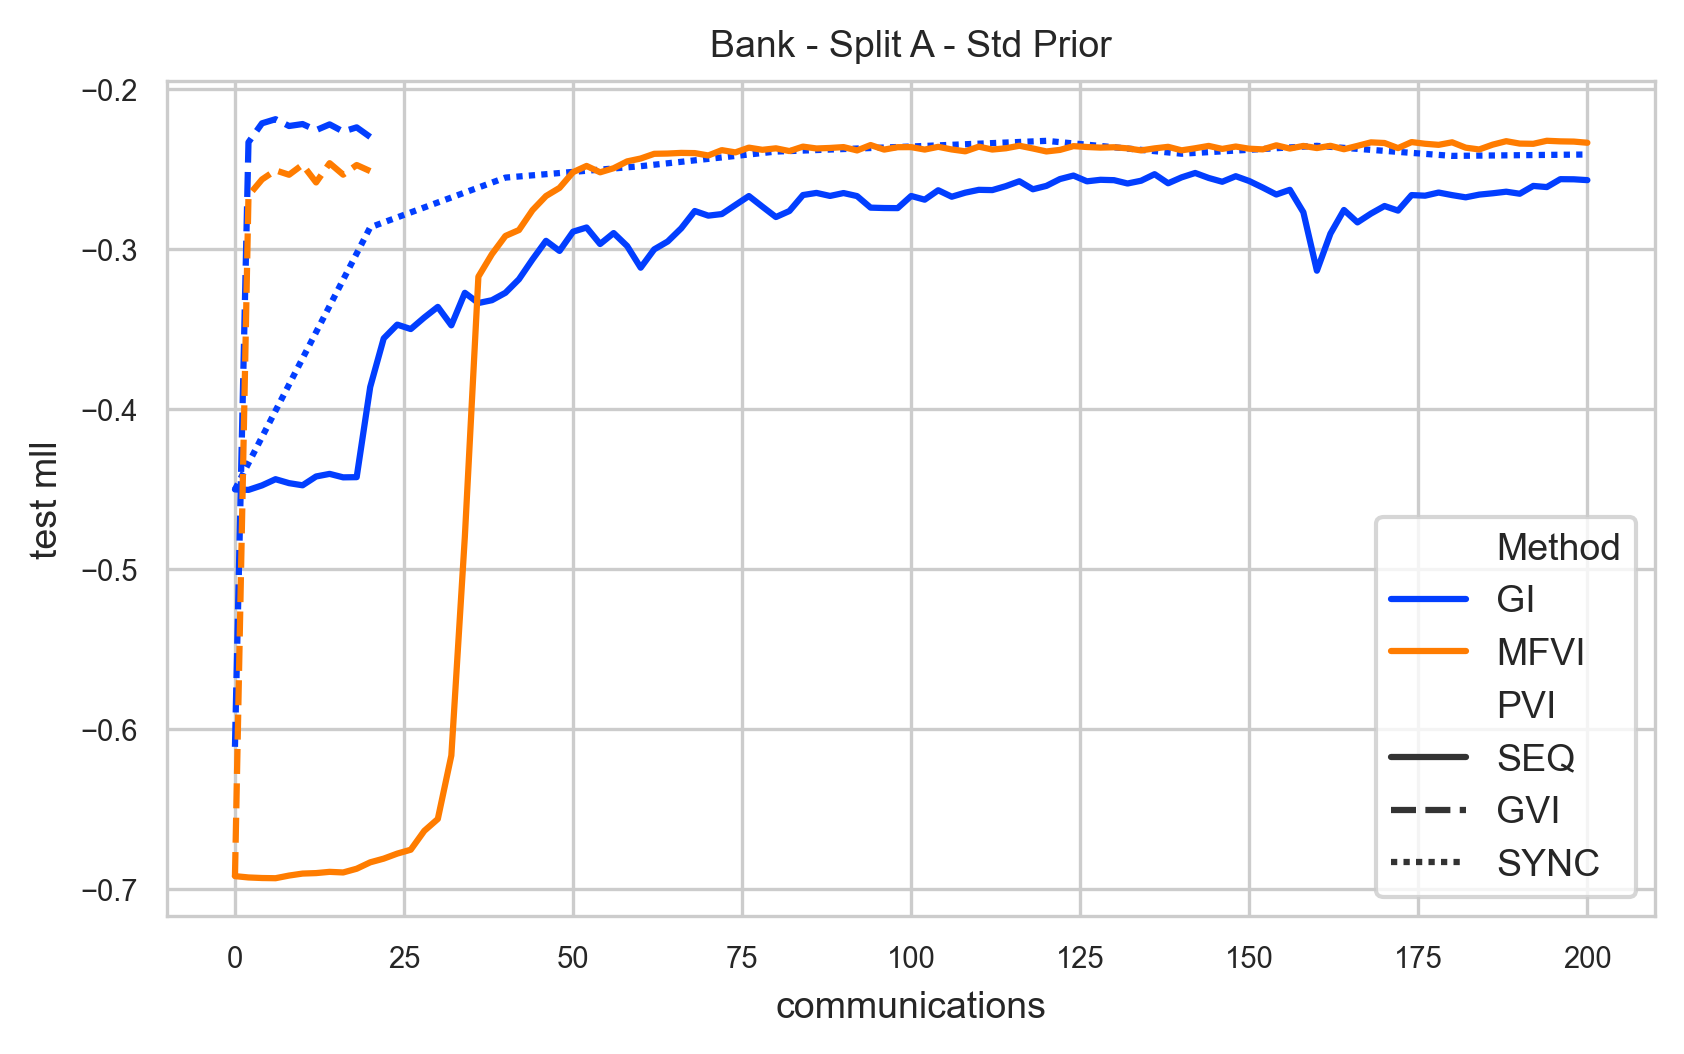

In [51]:
_start = datetime.datetime.utcnow()
_time = _start.strftime("%m-%d-%H-%M")

with plt.rc_context({**figsizes.neurips2022(ncols=1), **fontsizes.neurips2022()}):
    fig, ax = plt.subplots(1, 1)

    x_metric = 'communications'
    y_metric = 'test_mll'
    
    sns.lineplot(data=data, x=x_metric, y=y_metric, ax=ax, hue=variational_name, style=pvi_name)
    
    ax.set_title(f'{dataset} - Split {split} - Std Prior')    
    ax.set_ylabel(' '.join(y_metric.split('_')))
    ax.set_xlabel(' '.join(x_metric.split('_')))
    ax.legend(loc="lower right", prop={"size": 9})

    file_name = f"./{img_folder}/{dataset}_{split}_{_time}_server_{x_metric}_{y_metric}"
    # if omit_sync_mfvi: file_name += "_omit_sync_mfvi"

    file_name += append_file_name
    if save_plot: plt.savefig(file_name)
    plt.show()

### Client

In [54]:
client.columns

Index(['global_iteration', 'local_iteration', 'total_iteration', 'vfe', 'll',
       'kl', 'error', 'PVI', 'Method', 'Split', 'Dataset', 'Client',
       'Number of clients', 'Experiment name'],
      dtype='object')

In [315]:
dataset = "Adult"
split = "A"
omit_sync_mfvi = True
save_plot = False

data = client.loc[client[split_name] == split]
data = data.loc[data[dataset_name] == dataset]

if omit_sync_mfvi:
    data = data.loc[~((data[pvi_name] == 'SYNC') & (data[variational_name] == 'MFVI'))]

data = data.sort_values(by=[variational_name, split_name, dataset_name, experiment_name, 'total_iteration'])

# Check whether these are the experiments you want to plot.
pd.unique(data[experiment_name])

array(['seq-pvi-adult-10c-10g-1000l-nealprior-128b-0-02lr-2s-100m-project-tight',
       'seq-pvi-adult-1c-10g-1000l-nealprior-128b-0-02lr-2s-100m-gvi',
       'sync-pvi-adult-10c-10g-2000l-nealprior-splita-128b-0-02lr-2s-100m-longer-l',
       'seq-mfvi-adult-10c-10g-1000l-nealprior-128b-0-02lr-2s-equaltogi',
       'sync-mfvi-adult-1c-10g-1000l-nealprior-128b-0-02lr-2s-gvi'],
      dtype=object)

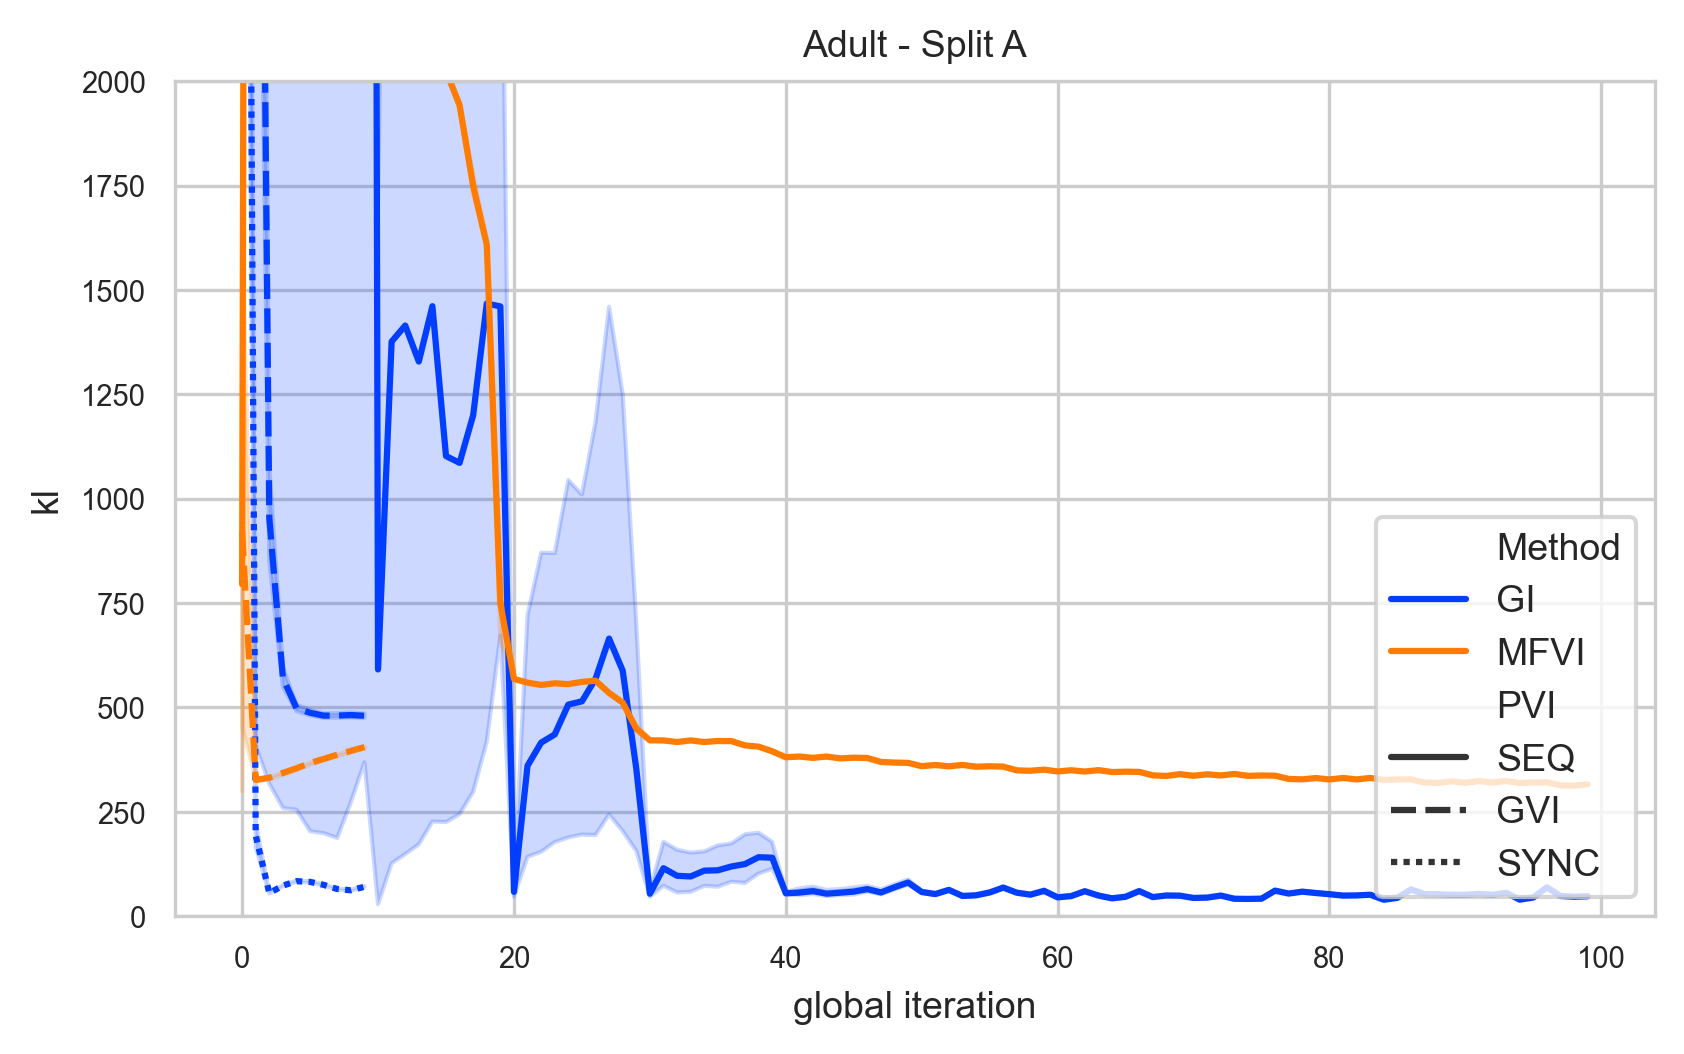

In [321]:
with plt.rc_context({**figsizes.neurips2022(ncols=1), **fontsizes.neurips2022()}):
    fig, ax = plt.subplots(1, 1)
    
    y_metric = "kl"
    x_metric = "global_iteration"
    
    sns.lineplot(data=data.loc[data[dataset_name] == dataset], x=x_metric, y=y_metric, ax=ax, hue=variational_name, style=pvi_name)
    
    ax.set_title(f'{dataset} - Split {split}')    
    ax.set_ylabel(' '.join(y_metric.split('_')))
    ax.set_xlabel(' '.join(x_metric.split('_')))
    ax.legend(loc="lower right", prop={"size": 9})

    ax.set_ylim(0, 2000)

    file_name = f"./{img_folder}/{split}_{dataset}_client_{x_metric}_{y_metric}"
    if omit_sync_mfvi: file_name += "_omit_sync_mfvi"

    if save_plot: plt.savefig(file_name)
    plt.show()
